# **Hotel Reviews Analysis**

### Hudson Finch-Batista

In [3]:
import sys
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install geopy

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
from nltk.corpus import stopwords as nltk_stopwords
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix as plot_cm
import urllib.request, urllib.parse, urllib.error 
import json
import ssl
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

    100% |████████████████████████████████| 21.8MB 589kB/s eta 0:00:01          | 901kB 32.8MB/s eta 0:00:01    19% |██████▍                         | 4.3MB 27.4MB/s eta 0:00:01    91% |█████████████████████████████▏  | 19.9MB 29.5MB/s eta 0:00:01
You are using pip version 10.0.1, however version 21.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/be/33/5bdd39587f0e8ede3fe12d9d16d6f1fb5e7a43f29621604a949ee362d013/wordcloud-1.8.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/49/d2/057683bbe4f8cccbd74f9b98dee5b1c5b94c06c115790d4bb50ec31aab77/numpy-1.21.1-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c1/2b/15bcb97edd8216cd25fc2cfe984e6259bfab7f3c590bba12a25f07bd3070/Pillow-8.3.1-cp37-cp37m-macosx_10_10_x86_64.whl
    100% |████████████████████████████████| 7.2MB 4.6MB/s eta 0:00:01 1% |▎                               | 71kB 6.6MB/s e

In [95]:
data = pd.read_csv('Final_Hotel_Reviews_Clean.csv',index_col=0)
data.head(10)

,Hotel_Name,Review,Rating,User_Location,Helpful_Votes,Number_Of_Rooms,Review_Title,Trip_Type,Ranking,Price_Range,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking
0,Eden_Lodge_Paris-Paris_Ile_de_France,We decided to stay one night at this ‘hotel’ a...,3.0,canada,40,5,More ‘b&b’ than hotel,Trip type: Travelled with family,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,32,207,342,28,0,0
1,Eden_Lodge_Paris-Paris_Ile_de_France,Having had experiences with other establishmen...,2.0,"Grottammare, Italy",103,5,Poorly managed property,Trip type: Travelled on business,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,171,207,342,28,0,0
2,Eden_Lodge_Paris-Paris_Ile_de_France,We loved everything about Eden Lodge! The lo...,5.0,"Stockholm, Sweden",2,5,A small and lovely gem in Paris!,Trip type: Travelled with friends,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,1,207,342,28,0,0
3,Eden_Lodge_Paris-Paris_Ile_de_France,It's little bit tricky to find it if you arriv...,5.0,NaN,3,5,Paradice in the heart of Paris,Trip type: Travelled as a couple,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,9,207,342,28,0,0
4,Eden_Lodge_Paris-Paris_Ile_de_France,Wonderfully hidden behind an inconspicuous doo...,4.0,"Antwerp, Belgium",63,5,Peaceful oasis in the midst of vibrance,NaN,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,121,207,342,28,0,0
5,Hotel_Malte_Astotel-Paris_Ile_de_France,"The hotel is located in a nice, quiet area nea...",5.0,NaN,None,64,Perfect stay,Trip type: Travelled with family,"['#5 of 1,868 hotels in Paris']",['US$167 - US$379 (Based on Average Rates for ...,1,167,379,0,5,0
6,Hotel_Malte_Astotel-Paris_Ile_de_France,We stayed for a total of 9 nights. We original...,5.0,"Newark, California",9,64,Highly recommended,Trip type: Travelled with family,"['#5 of 1,868 hotels in Paris']",['US$167 - US$379 (Based on Average Rates for ...,20,167,379,0,5,0
7,Hotel_Malte_Astotel-Paris_Ile_de_France,I stayed in Malte Astotel during the weekend o...,5.0,"Luxembourg City, Luxembourg",None,64,Very friendly and warm service,Trip type: Travelled with family,"['#5 of 1,868 hotels in Paris']",['US$167 - US$379 (Based on Average Rates for ...,9,167,379,0,5,0
8,Hotel_Malte_Astotel-Paris_Ile_de_France,"I have been to Paris 4 times, this was the cle...",5.0,"Phoenix, Arizona",1,64,Excellent Hotel,NaN,"['#5 of 1,868 hotels in Paris']",['US$167 - US$379 (Based on Average Rates for ...,2,167,379,0,5,0
9,Hotel_Malte_Astotel-Paris_Ile_de_France,"The Manager, Alex, helped us to find a restaur...",5.0,NaN,None,64,Above and Beyond - Exceptional Service,Trip type: Travelled as a couple,"['#5 of 1,868 hotels in Paris']",['US$167 - US$379 (Based on Average Rates for ...,1,167,379,0,5,0


## Cleaning and Preprocessing

In [96]:
for i in range(len(data)):
    if not pd.isnull(data['Trip_Type'][i]):
        if re.search('^Trip type:',data['Trip_Type'][i]):
            data['Trip_Type'][i] = re.sub('(^Trip type:)','', data['Trip_Type'][i])
data.head()

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hotel_Name,Review,Rating,User_Location,Helpful_Votes,Number_Of_Rooms,Review_Title,Trip_Type,Ranking,Price_Range,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking
0,Eden_Lodge_Paris-Paris_Ile_de_France,We decided to stay one night at this ‘hotel’ a...,3.0,canada,40,5,More ‘b&b’ than hotel,Travelled with family,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,32,207,342,28,0,0
1,Eden_Lodge_Paris-Paris_Ile_de_France,Having had experiences with other establishmen...,2.0,"Grottammare, Italy",103,5,Poorly managed property,Travelled on business,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,171,207,342,28,0,0
2,Eden_Lodge_Paris-Paris_Ile_de_France,We loved everything about Eden Lodge! The lo...,5.0,"Stockholm, Sweden",2,5,A small and lovely gem in Paris!,Travelled with friends,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,1,207,342,28,0,0
3,Eden_Lodge_Paris-Paris_Ile_de_France,It's little bit tricky to find it if you arriv...,5.0,NaN,3,5,Paradice in the heart of Paris,Travelled as a couple,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,9,207,342,28,0,0
4,Eden_Lodge_Paris-Paris_Ile_de_France,Wonderfully hidden behind an inconspicuous doo...,4.0,"Antwerp, Belgium",63,5,Peaceful oasis in the midst of vibrance,NaN,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,121,207,342,28,0,0


In [97]:
data['Sentiment'] = ''

for i in range(len(data)):
    if data['Rating'][i] > 3:
        data['Sentiment'][i] = 'Positive'
    elif data['Rating'][i] == 3:
        data['Sentiment'][i] = 'Neutral'
    else:
        data['Sentiment'][i] = 'Negative'
        
data.head()

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hotel_Name,Review,Rating,User_Location,Helpful_Votes,Number_Of_Rooms,Review_Title,Trip_Type,Ranking,Price_Range,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking,Sentiment
0,Eden_Lodge_Paris-Paris_Ile_de_France,We decided to stay one night at this ‘hotel’ a...,3.0,canada,40,5,More ‘b&b’ than hotel,Travelled with family,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,32,207,342,28,0,0,Neutral
1,Eden_Lodge_Paris-Paris_Ile_de_France,Having had experiences with other establishmen...,2.0,"Grottammare, Italy",103,5,Poorly managed property,Travelled on business,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,171,207,342,28,0,0,Negative
2,Eden_Lodge_Paris-Paris_Ile_de_France,We loved everything about Eden Lodge! The lo...,5.0,"Stockholm, Sweden",2,5,A small and lovely gem in Paris!,Travelled with friends,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,1,207,342,28,0,0,Positive
3,Eden_Lodge_Paris-Paris_Ile_de_France,It's little bit tricky to find it if you arriv...,5.0,NaN,3,5,Paradice in the heart of Paris,Travelled as a couple,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,9,207,342,28,0,0,Positive
4,Eden_Lodge_Paris-Paris_Ile_de_France,Wonderfully hidden behind an inconspicuous doo...,4.0,"Antwerp, Belgium",63,5,Peaceful oasis in the midst of vibrance,NaN,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,121,207,342,28,0,0,Positive


In [98]:
data['Price'] = 0

for i in range(len(data)):
    data['Price'][i] = np.random.normal((data['Low_Price_Room'][i] + data['High_Price_Room'][i])/2)

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
data.head()

,Hotel_Name,Review,Rating,User_Location,Helpful_Votes,Number_Of_Rooms,Review_Title,Trip_Type,Ranking,Price_Range,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking,Sentiment,Price
0,Eden_Lodge_Paris-Paris_Ile_de_France,We decided to stay one night at this ‘hotel’ a...,3.0,canada,40,5,More ‘b&b’ than hotel,Travelled with family,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,32,207,342,28,0,0,Neutral,272
1,Eden_Lodge_Paris-Paris_Ile_de_France,Having had experiences with other establishmen...,2.0,"Grottammare, Italy",103,5,Poorly managed property,Travelled on business,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,171,207,342,28,0,0,Negative,274
2,Eden_Lodge_Paris-Paris_Ile_de_France,We loved everything about Eden Lodge! The lo...,5.0,"Stockholm, Sweden",2,5,A small and lovely gem in Paris!,Travelled with friends,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,1,207,342,28,0,0,Positive,275
3,Eden_Lodge_Paris-Paris_Ile_de_France,It's little bit tricky to find it if you arriv...,5.0,NaN,3,5,Paradice in the heart of Paris,Travelled as a couple,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,9,207,342,28,0,0,Positive,275
4,Eden_Lodge_Paris-Paris_Ile_de_France,Wonderfully hidden behind an inconspicuous doo...,4.0,"Antwerp, Belgium",63,5,Peaceful oasis in the midst of vibrance,NaN,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,121,207,342,28,0,0,Positive,273


In [100]:
type(data['Helpful_Votes'][0])

str

In [101]:
count = 0
for i in range(len(data)):
    if data['Helpful_Votes'][i] == 'None':
        count += 1
        data['Helpful_Votes'][i] = 0
count

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1196

In [102]:
data['Helpful_Votes'] = data['Helpful_Votes'].astype(int)

In [103]:
data['Helpful_Votes'].value_counts()

0      1196
1       596
2       299
3       177
5       126
       ... 
328       1
157       1
304       1
195       1
224       1
Name: Helpful_Votes, Length: 274, dtype: int64

In [104]:
data['Contributions'].value_counts()

1      1236
2       355
3       240
4       199
5       172
       ... 
964       1
431       1
890       1
426       1
429       1
Name: Contributions, Length: 499, dtype: int64

In [105]:
data['Rating'].value_counts()

5.0    2698
4.0    1197
3.0     524
1.0     428
2.0     243
Name: Rating, dtype: int64

In [106]:
type(data['Rating'][0])

numpy.float64

## **Analysis 1: Hudson**

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



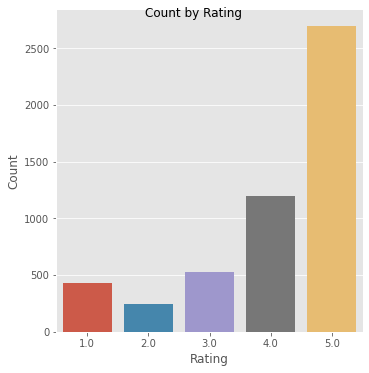

In [107]:
rating = sns.factorplot('Rating', data=data, kind='count')
rating.fig.suptitle('Count by Rating')
rating.set_axis_labels('Rating', "Count")
plt.show()

In [108]:
data['Trip_Type'].value_counts()

 Travelled as a couple     1043
 Travelled with family      674
 Travelled on business      655
 Travelled solo             327
 Travelled with friends     294
Name: Trip_Type, dtype: int64

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



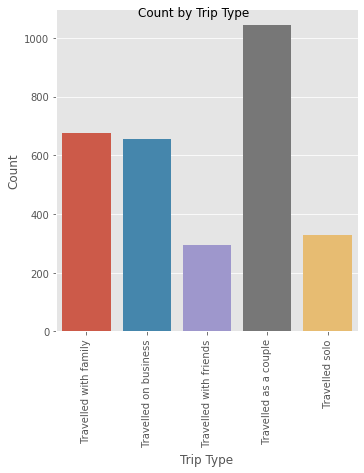

In [109]:
trip = sns.factorplot('Trip_Type', data=data, kind='count')
trip.fig.suptitle('Count by Trip Type')
trip.set_axis_labels('Trip Type', "Count")
plt.xticks(rotation = 90)
plt.show()

In [110]:
data.isnull().sum()

Hotel_Name               0
Review                   0
Rating                   0
User_Location         1582
Helpful_Votes            0
Number_Of_Rooms          0
Review_Title             0
Trip_Type             2097
Ranking                  0
Price_Range              0
Contributions            0
Low_Price_Room           0
High_Price_Room          0
B&B_Ranking              0
Hotel_Ranking            0
Spec_Lodge_Ranking       0
Sentiment                0
Price                    0
dtype: int64

In [111]:
data2 = data[~pd.isnull(data['Trip_Type'])].reset_index()
data2.drop('index',axis=1,inplace=True)
data2.isnull().sum()

Hotel_Name              0
Review                  0
Rating                  0
User_Location         923
Helpful_Votes           0
Number_Of_Rooms         0
Review_Title            0
Trip_Type               0
Ranking                 0
Price_Range             0
Contributions           0
Low_Price_Room          0
High_Price_Room         0
B&B_Ranking             0
Hotel_Ranking           0
Spec_Lodge_Ranking      0
Sentiment               0
Price                   0
dtype: int64

In [112]:
data2.head()

,Hotel_Name,Review,Rating,User_Location,Helpful_Votes,Number_Of_Rooms,Review_Title,Trip_Type,Ranking,Price_Range,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking,Sentiment,Price
0,Eden_Lodge_Paris-Paris_Ile_de_France,We decided to stay one night at this ‘hotel’ a...,3.0,canada,40,5,More ‘b&b’ than hotel,Travelled with family,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,32,207,342,28,0,0,Neutral,272
1,Eden_Lodge_Paris-Paris_Ile_de_France,Having had experiences with other establishmen...,2.0,"Grottammare, Italy",103,5,Poorly managed property,Travelled on business,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,171,207,342,28,0,0,Negative,274
2,Eden_Lodge_Paris-Paris_Ile_de_France,We loved everything about Eden Lodge! The lo...,5.0,"Stockholm, Sweden",2,5,A small and lovely gem in Paris!,Travelled with friends,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,1,207,342,28,0,0,Positive,275
3,Eden_Lodge_Paris-Paris_Ile_de_France,It's little bit tricky to find it if you arriv...,5.0,NaN,3,5,Paradice in the heart of Paris,Travelled as a couple,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,9,207,342,28,0,0,Positive,275
4,Hotel_Malte_Astotel-Paris_Ile_de_France,"The hotel is located in a nice, quiet area nea...",5.0,NaN,0,64,Perfect stay,Travelled with family,"['#5 of 1,868 hotels in Paris']",['US$167 - US$379 (Based on Average Rates for ...,1,167,379,0,5,0,Positive,273


In [113]:
data3 = data[~pd.isnull(data['User_Location'])].reset_index()
data3.isnull().sum()

index                    0
Hotel_Name               0
Review                   0
Rating                   0
User_Location            0
Helpful_Votes            0
Number_Of_Rooms          0
Review_Title             0
Trip_Type             1438
Ranking                  0
Price_Range              0
Contributions            0
Low_Price_Room           0
High_Price_Room          0
B&B_Ranking              0
Hotel_Ranking            0
Spec_Lodge_Ranking       0
Sentiment                0
Price                    0
dtype: int64

In [114]:
data3.drop('index',axis=1,inplace=True)

In [115]:
data3['User_Location'].value_counts()

London, United Kingdom      226
Paris, France                79
New York City, New York      79
Sydney, Australia            35
Los Angeles, California      34
                           ... 
panama                        1
Pittsburgh, Pennsylvania      1
Lewes, United Kingdom         1
Minato, Japan                 1
Amersham, United Kingdom      1
Name: User_Location, Length: 1622, dtype: int64

In [116]:
type(data3['User_Location'][0])

str

In [117]:
data3['User_Location'].value_counts().loc[lambda x: x > 20]

London, United Kingdom         226
Paris, France                   79
New York City, New York         79
Sydney, Australia               35
Los Angeles, California         34
Singapore, Singapore            31
Toronto, Canada                 28
Amsterdam, The Netherlands      27
San Francisco, California       26
Dubai, United Arab Emirates     26
Melbourne, Australia            25
Dublin, Ireland                 24
Stockholm, Sweden               21
Name: User_Location, dtype: int64

In [118]:
top_places = data3['User_Location'].value_counts().loc[lambda x: x > 20].index.values

In [119]:
data_locations = data3[data3['User_Location'].isin(top_places)]
data_locations['User_Location'].value_counts()

London, United Kingdom         226
New York City, New York         79
Paris, France                   79
Sydney, Australia               35
Los Angeles, California         34
Singapore, Singapore            31
Toronto, Canada                 28
Amsterdam, The Netherlands      27
Dubai, United Arab Emirates     26
San Francisco, California       26
Melbourne, Australia            25
Dublin, Ireland                 24
Stockholm, Sweden               21
Name: User_Location, dtype: int64

In [120]:
data_locations.head()

,Hotel_Name,Review,Rating,User_Location,Helpful_Votes,Number_Of_Rooms,Review_Title,Trip_Type,Ranking,Price_Range,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking,Sentiment,Price
2,Eden_Lodge_Paris-Paris_Ile_de_France,We loved everything about Eden Lodge! The lo...,5.0,"Stockholm, Sweden",2,5,A small and lovely gem in Paris!,Travelled with friends,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,1,207,342,28,0,0,Positive,275
11,Hotel_34B_Astotel-Paris_Ile_de_France,I have just returned from an excellent stay at...,5.0,"Dublin, Ireland",31,128,Highly recommended,NaN,"['#35 of 1,868 hotels in Paris']",['US$129 - US$252 (Based on Average Rates for ...,1,129,252,0,35,0,Positive,191
19,Hotel_La_Manufacture-Paris_Ile_de_France,Hi. Thanks Amina for such a good service. Espe...,5.0,"London, United Kingdom",1,56,Visitors,Travelled solo,"['#264 of 1,868 hotels in Paris']",['US$69 - US$328 (Based on Average Rates for a...,1,69,328,0,264,0,Positive,198
24,Grand_Hotel_du_Palais_Royal-Paris_Ile_de_France,We’ve been literally thrilled with our night! ...,5.0,"London, United Kingdom",1,68,Amazing romantic stay,Travelled as a couple,"['#49 of 1,868 hotels in Paris']",['US$387 - US$695 (Based on Average Rates for ...,5,387,695,0,49,0,Positive,539
25,Grand_Hotel_du_Palais_Royal-Paris_Ile_de_France,This lovely historic hotel is located in what ...,5.0,"Toronto, Canada",147,68,Beautiful hotel in an ideal location,Travelled as a couple,"['#49 of 1,868 hotels in Paris']",['US$387 - US$695 (Based on Average Rates for ...,248,387,695,0,49,0,Positive,541


In [121]:
data_locations.reset_index(inplace=True)

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



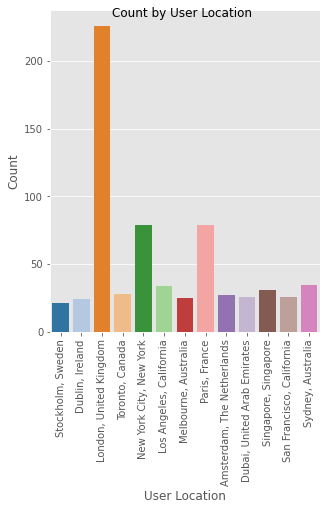

In [122]:
location = sns.factorplot('User_Location', data=data_locations, kind='count', palette='tab20')
location.fig.suptitle('Count by User Location')
location.set_axis_labels('User Location', "Count")
plt.xticks(rotation = 90)
plt.set_cmap('tab20')
plt.show()

In [123]:
data.groupby(['Trip_Type','Rating']).size().reset_index(name='Count')

,Trip_Type,Rating,Count
0,Travelled as a couple,1.0,97
1,Travelled as a couple,2.0,56
2,Travelled as a couple,3.0,129
3,Travelled as a couple,4.0,252
4,Travelled as a couple,5.0,509
5,Travelled on business,1.0,74
6,Travelled on business,2.0,47
7,Travelled on business,3.0,82
8,Travelled on business,4.0,154
9,Travelled on business,5.0,298


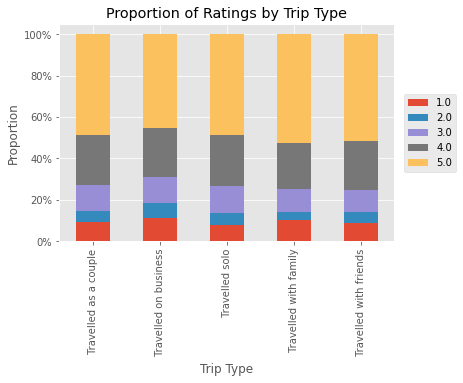

In [124]:
trips_by_rating = data.groupby(['Trip_Type','Rating'])['Rating'].count()
trips_by_rating2 = trips_by_rating.unstack()

trips_by_rating2 = trips_by_rating2.fillna(0)

trips_by_rating3 = trips_by_rating2.apply(lambda x: x*100/sum(x),axis=1)

trips_by_rating3.plot(kind='bar', stacked=True, title='Proportion of Ratings by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Proportion')
plt.legend(loc='center right',bbox_to_anchor=(1.2,0.5))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
plt.show()

In [125]:
data_locations.groupby(['User_Location','Rating']).size().reset_index(name='Count')

,User_Location,Rating,Count
0,"Amsterdam, The Netherlands",1.0,1
1,"Amsterdam, The Netherlands",2.0,4
2,"Amsterdam, The Netherlands",3.0,6
3,"Amsterdam, The Netherlands",4.0,4
4,"Amsterdam, The Netherlands",5.0,12
5,"Dubai, United Arab Emirates",1.0,3
6,"Dubai, United Arab Emirates",3.0,1
7,"Dubai, United Arab Emirates",4.0,5
8,"Dubai, United Arab Emirates",5.0,17
9,"Dublin, Ireland",2.0,2


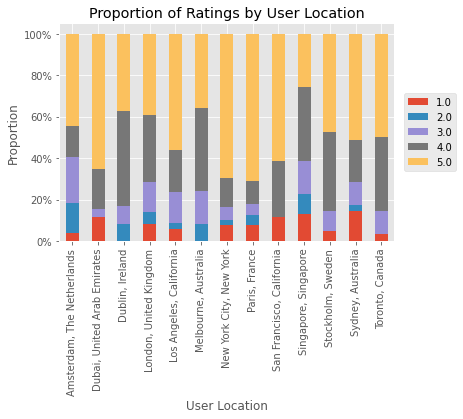

In [126]:
locations_by_rating = data_locations.groupby(['User_Location','Rating'])['Rating'].count()
locations_by_rating2 = locations_by_rating.unstack()

locations_by_rating2 = locations_by_rating2.fillna(0)

locations_by_rating3 = locations_by_rating2.apply(lambda x: x*100/sum(x),axis=1)

locations_by_rating3.plot(kind='bar', stacked=True, title='Proportion of Ratings by User Location')
plt.xlabel('User Location')
plt.ylabel('Proportion')
plt.legend(loc='center right',bbox_to_anchor=(1.2,0.5))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
plt.show()

In [127]:
def text_preprocessor(features):
    processed_features = []

    for i in range(0, len(features)):
        # Remove all the special characters
        processed_feature = re.sub(r'\W', ' ', str(features[i]))

        # remove all single characters
        processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

        # Remove single characters from the start
        processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

        # Substituting multiple spaces with single space
        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

        # Converting to Lowercase
        processed_feature = processed_feature.lower()

        processed_features.append(processed_feature)

    return processed_features

In [128]:
trips = data['Trip_Type'].value_counts().index.values
trips

array([' Travelled as a couple', ' Travelled with family',
       ' Travelled on business', ' Travelled solo',
       ' Travelled with friends'], dtype=object)

Here is the positive wordcloud for guests that Travelled as a couple


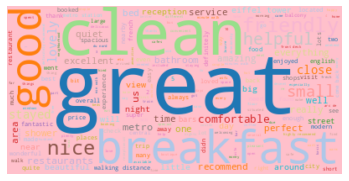


Here is the negative wordcloud for guests that Travelled as a couple


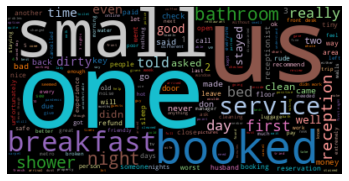


Here is the neutral wordcloud for guests that Travelled as a couple


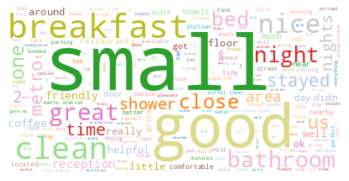


Here is the positive wordcloud for guests that Travelled with family


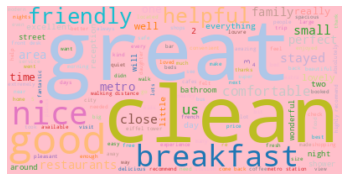


Here is the negative wordcloud for guests that Travelled with family


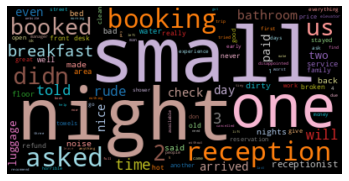


Here is the neutral wordcloud for guests that Travelled with family


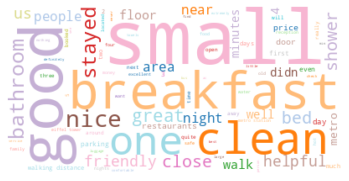


Here is the positive wordcloud for guests that Travelled on business


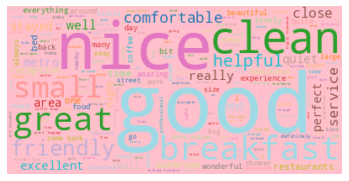


Here is the negative wordcloud for guests that Travelled on business


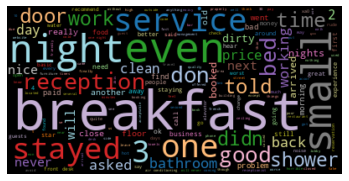


Here is the neutral wordcloud for guests that Travelled on business


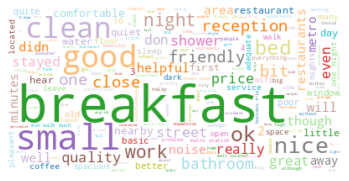


Here is the positive wordcloud for guests that Travelled solo


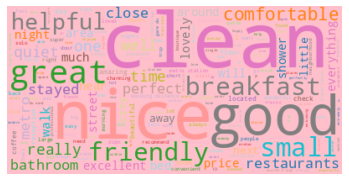


Here is the negative wordcloud for guests that Travelled solo


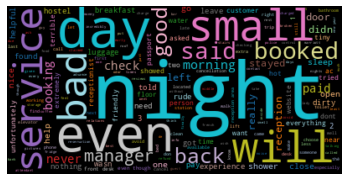


Here is the neutral wordcloud for guests that Travelled solo


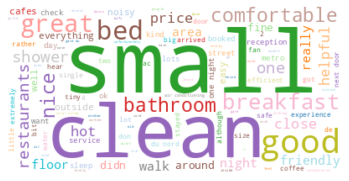


Here is the positive wordcloud for guests that Travelled with friends


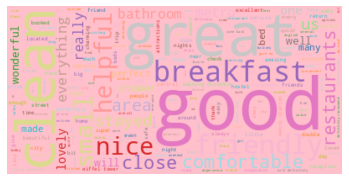


Here is the negative wordcloud for guests that Travelled with friends


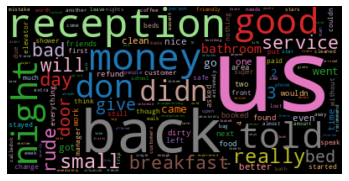


Here is the neutral wordcloud for guests that Travelled with friends


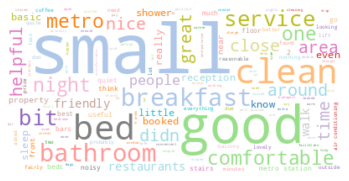

In [129]:
alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)
stopwords = set(STOPWORDS)
stopwords.update(
    ['hotel','room','rooms','hotels','staff','paris','stay','place','location'])
stopwords.update(alphabet_list)

trips_revs_sents = []
sents = ['Positive','Negative','Neutral']

for trip in trips:
    text_trip = data2[data2['Trip_Type'] == trip]
    for sent in sents:
        text_trip_sent = text_trip[text_trip['Sentiment'] == sent]
        if sent == 'Negative':
            color = 'black'
        elif sent == 'Neutral':
            color = 'white'
        else:
            color = 'pink'
        if len(text_trip_sent) > 0:
            features = text_trip_sent.loc[:,['Review']].values
            full_text = text_preprocessor(features)
            full_text2 = " ".join(text for text in full_text)
            trips_revs_sents.append((full_text2,color,trip))
    
for rev, col, trip in trips_revs_sents:
    
    if col == 'black':
        print(f'Here is the negative wordcloud for guests that{trip}')
    elif col == 'white':
        print(f'Here is the neutral wordcloud for guests that{trip}')
    else:
        print(f'Here is the positive wordcloud for guests that{trip}')
    
    # Generates a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, colormap='tab20', background_color=col, include_numbers=True, relative_scaling=1, normalize_plurals=False).generate(rev)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('')

In [130]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

data_locs = data.copy()
data_locs['Country'] = ''

for i in range(len(data)):
    if not pd.isnull(data['User_Location'][i]):
        if ',' in data['User_Location'][i]:
            if data['User_Location'][i].split(',')[1].strip().title() not in state_names:
                data_locs['Country'][i] = data['User_Location'][i].split(',')[1].strip().title()
            else:
                data_locs['Country'][i] = 'United States'

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
locs = pd.DataFrame(data_locs.groupby('Country').size().reset_index(name='Count'))
locs = locs[1:][:]
locs.sort_values(by='Count',ascending=False)

,Country,Count
139,United Kingdom,752
140,United States,750
41,France,181
4,Australia,139
13,Canada,111
...,...,...
72,Mg,1
70,Mendoza,1
69,Mayotte,1
68,Martinique,1


In [132]:
data3['Latitude_Longitude'] = ''

api_key = 'API_key'

serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json?'
# Ignore SSL certificate errors
ctx = ssl.create_default_context() 
ctx.check_hostname = False 
ctx.verify_mode = ssl.CERT_NONE

i = 0
for address in data3['User_Location']:
        parms = dict()
        parms['address'] = address
        if api_key is not False: 
            parms['key'] = api_key 
        url = serviceurl + urllib.parse.urlencode(parms)
        uh = urllib.request.urlopen(url, context=ctx) 
        info = uh.read().decode()
        try:
            js = json.loads(info)
        except:
            js = None
        if not js or 'status' not in js or js['status'] != 'OK': 
            print('==== Failure To Retrieve ====')
            continue

        lat = js['results'][0]['geometry']['location']['lat'] 
        lng = js['results'][0]['geometry']['location']['lng']

        data3['Latitude_Longitude'][i] = (lat,lng)
        i+=1

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



==== Failure To Retrieve ====


In [133]:
data3['Latitude_Longitude'].value_counts()

(51.5073509, -0.1277583)                  248
(40.7127753, -74.0059728)                 108
(48.856614, 2.3522219)                     86
(-33.8688197, 151.2092955)                 41
(34.0522342, -118.2436849)                 39
                                         ... 
(34.85261759999999, -82.3940104)            1
(46.4312213, 6.9106799)                     1
(41.7001009, -71.4161671)                   1
(50.18233559999999, 8.739480499999999)      1
                                            1
Name: Latitude_Longitude, Length: 1478, dtype: int64

In [134]:
data3.head()

,Hotel_Name,Review,Rating,User_Location,Helpful_Votes,Number_Of_Rooms,Review_Title,Trip_Type,Ranking,Price_Range,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking,Sentiment,Price,Latitude_Longitude
0,Eden_Lodge_Paris-Paris_Ile_de_France,We decided to stay one night at this ‘hotel’ a...,3.0,canada,40,5,More ‘b&b’ than hotel,Travelled with family,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,32,207,342,28,0,0,Neutral,272,"(56.130366, -106.346771)"
1,Eden_Lodge_Paris-Paris_Ile_de_France,Having had experiences with other establishmen...,2.0,"Grottammare, Italy",103,5,Poorly managed property,Travelled on business,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,171,207,342,28,0,0,Negative,274,"(42.9853425, 13.8683671)"
2,Eden_Lodge_Paris-Paris_Ile_de_France,We loved everything about Eden Lodge! The lo...,5.0,"Stockholm, Sweden",2,5,A small and lovely gem in Paris!,Travelled with friends,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,1,207,342,28,0,0,Positive,275,"(59.32932349999999, 18.0685808)"
3,Eden_Lodge_Paris-Paris_Ile_de_France,Wonderfully hidden behind an inconspicuous doo...,4.0,"Antwerp, Belgium",63,5,Peaceful oasis in the midst of vibrance,NaN,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,121,207,342,28,0,0,Positive,273,"(51.2194475, 4.4024643)"
4,Hotel_Malte_Astotel-Paris_Ile_de_France,We stayed for a total of 9 nights. We original...,5.0,"Newark, California",9,64,Highly recommended,Travelled with family,"['#5 of 1,868 hotels in Paris']",['US$167 - US$379 (Based on Average Rates for ...,20,167,379,0,5,0,Positive,273,"(37.5299765, -122.0383968)"


In [135]:
rand_loc = data3['Latitude_Longitude'][0][1]

print(rand_loc)

-106.346771


In [136]:
type(data3['Latitude_Longitude'][0]) is tuple

True

In [137]:
len(data3['Latitude_Longitude'][0])

2

In [138]:
fmap = folium.Map(location=[-77.0668, 39.1483],
                     tiles="Cartodb Positron",
                     zoom_start=12,max_bounds=True)

marker_cluster = folium.plugins.MarkerCluster()

In [139]:
for i in range(len(data3)):
    if len(data3['Latitude_Longitude'][i]) == 2: 
        lat = data3['Latitude_Longitude'][i][0]
        long = data3['Latitude_Longitude'][i][1]
        marker = folium.map.Marker([lat, long])
        marker_cluster.add_child(marker)

In [140]:
fmap.add_child(marker_cluster)
fmap

In [141]:
## Create a column that gives the number of words for each review
data['Num_Words_Review'] = data['Review'].apply(lambda x: len(x.split()))

## Create variable that categorizes or bins the number of words for each review
data['Bins'] = pd.cut(data['Num_Words_Review'], bins=[0,30,60,90,120,150,180,210], labels=['0-30','30-60','60-90','90-120','120-150','150-180','180-210'])

## Group the data by bin counts
word_dist = data.groupby('Bins').size().reset_index().rename(columns={0:'Counts'})

word_dist

,Bins,Counts
0,0-30,19
1,30-60,2120
2,60-90,1054
3,90-120,635
4,120-150,1059
5,150-180,203
6,180-210,0


In [142]:
max(data['Num_Words_Review'])

165

In [143]:
num_words_dict = {}
num_words_dicts = []

num_0_30 = [text for text in data[data['Bins'] == '0-30']['Review']]
num_30_60 = [text for text in data[data['Bins'] == '30-60']['Review']]
num_60_90 = [text for text in data[data['Bins'] == '60-90']['Review']]
num_90_120 = [text for text in data[data['Bins'] == '90-120']['Review']]
num_120_150 = [text for text in data[data['Bins'] == '120-150']['Review']]
num_150_180 = [text for text in data[data['Bins'] == '150-180']['Review']]

revs_list = [num_0_30, num_30_60, num_60_90, num_90_120, num_120_150,num_150_180]

for rev_list in revs_list:
    for rev in rev_list:
        rev_clean = rev.translate(str.maketrans('','',string.punctuation))
        rev_clean = rev_clean.replace('—', ' ')
        rev_clean = rev_clean.replace('-', ' ')
        rev_clean = rev_clean.lower().strip()
        rev_clean_words = rev_clean.split()
        for word in rev_clean_words:
            word = word.strip()
            if word not in stopwords:
                num_words_dict[word] = num_words_dict.get(word,0) + 1
    num_words_dicts.append(num_words_dict)
    num_words_dict = {}

In [144]:
num_words_lists_final = []
num_words_list_final = []

for d in num_words_dicts:
    for key,value in d.items():
        num_words_list_final.append((value,key))
    num_words_list_final.sort(reverse=True)
    num_words_lists_final.append(num_words_list_final)
    num_words_list_final = []

In [145]:
num_words_list = ['0-30','30-60','60-90','90-120','120-150','150-180']
for num_words, lst in zip(num_words_list,num_words_lists_final):
    print(f'The most freqeuntly occurring words for reviews with {num_words} words are:')
    print('')
    lst2 = lst[:15]
    for value, key in lst2:
        print(key, value)
    print('')

The most freqeuntly occurring words for reviews with 0-30 words are:

clean 8
nice 7
friendly 7
excellent 7
breakfast 7
restaurants 5
recommend 5
highly 5
great 5
good 5
around 5
metro 4
supermarket 3
small 3
quiet 3

The most freqeuntly occurring words for reviews with 30-60 words are:

good 870
clean 785
great 753
nice 726
friendly 629
breakfast 624
helpful 533
small 446
metro 391
comfortable 386
close 363
service 317
restaurants 302
recommend 300
well 288

The most freqeuntly occurring words for reviews with 60-90 words are:

good 489
clean 442
great 418
breakfast 418
small 335
nice 328
friendly 317
helpful 285
metro 283
close 221
us 218
comfortable 213
well 211
stayed 204
one 192

The most freqeuntly occurring words for reviews with 90-120 words are:

breakfast 301
good 269
small 258
great 256
clean 244
nice 232
friendly 201
helpful 199
metro 185
one 178
walk 167
us 166
stayed 161
well 158
night 144

The most freqeuntly occurring words for reviews with 120-150 words are:

breakfast

In [146]:
rev_len_rating = data.groupby('Bins')['Rating'].mean().reset_index()
rev_len_rating

,Bins,Rating
0,0-30,4.578947
1,30-60,4.344340
2,60-90,4.095825
3,90-120,3.924409
4,120-150,3.829084
5,150-180,2.970443
6,180-210,NaN


In [147]:
vectorizer = TfidfVectorizer(max_features=2000, min_df=7, max_df=0.8, stop_words=nltk_stopwords.words('english'))

In [148]:
features = data.loc[:,['Review']].values

processed_features = text_preprocessor(features)
    
processed_features[0]

' we decided to stay one night at this hotel at the end of trip to paris because of the reviews and it relative closeness to the gare de lyon which we arrived to by tgv first thing to note the hotel has no cooling system so for stays in the summer when temperatures can be in the 30s it not your best bet the air in the upstairs common area was stuffy and hot our room was better because we could open the large floor to ceiling window but there are lots of mosquitos because of dank and dirty small pool tub in the front yard and all the bees on the property so opening windows is not good option the dyson ventilator in the room doesn help don believe it a fan maybe an air purifier the property has no sign outside and it easy to miss if '

In [149]:
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [150]:
le = preprocessing.LabelEncoder()

labels = le.fit_transform(data['Rating'])

In [151]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)


In [152]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [153]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 57   0   1   1  22]
 [ 18   0   3  10  28]
 [  6   0   2  36  66]
 [  3   0   1  30 190]
 [  3   0   1   9 531]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        81
           1       0.00      0.00      0.00        59
           2       0.25      0.02      0.03       110
           3       0.35      0.13      0.19       224
           4       0.63      0.98      0.77       544

    accuracy                           0.61      1018
   macro avg       0.38      0.37      0.34      1018
weighted avg       0.49      0.61      0.51      1018

0.6090373280943026


/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



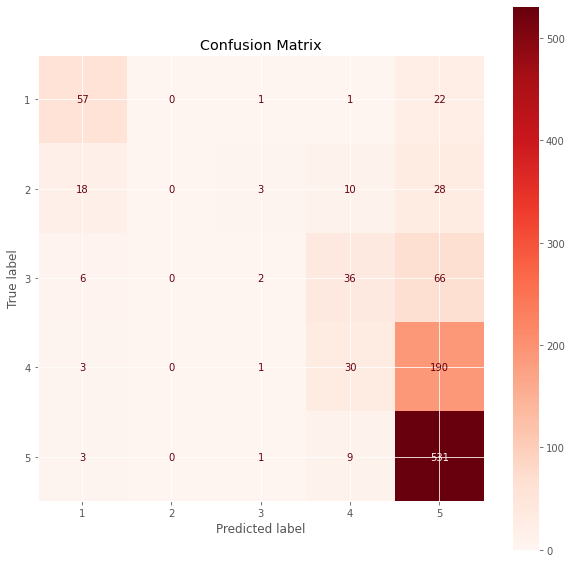

In [154]:
display_labels = [1,2,3,4,5]

plot_cm(text_classifier, X_test, y_test, display_labels = display_labels, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [155]:
data.corr()

,Rating,Helpful_Votes,Number_Of_Rooms,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking,Price,Num_Words_Review
Rating,1.000000,-0.014966,-0.062545,0.008554,0.152920,0.140674,0.011661,0.016428,-0.070713,0.150708,-0.232444
Helpful_Votes,-0.014966,1.000000,0.000820,0.227416,-0.004026,-0.008675,-0.002427,-0.011392,-0.004413,-0.007489,0.016160
Number_Of_Rooms,-0.062545,0.000820,1.000000,0.034476,0.136186,0.099389,-0.067177,0.052463,0.036618,0.116476,0.001672
Contributions,0.008554,0.227416,0.034476,1.000000,0.000109,-0.002617,-0.006817,0.011597,-0.011199,-0.001903,0.064180
Low_Price_Room,0.152920,-0.004026,0.136186,0.000109,1.000000,0.828751,-0.014832,-0.108027,-0.071572,0.922368,0.003528
High_Price_Room,0.140674,-0.008675,0.099389,-0.002617,0.828751,1.000000,-0.044899,-0.058738,-0.083421,0.980570,-0.015643
B&B_Ranking,0.011661,-0.002427,-0.067177,-0.006817,-0.014832,-0.044899,1.000000,-0.123050,-0.018431,-0.036345,0.040787
Hotel_Ranking,0.016428,-0.011392,0.052463,0.011597,-0.108027,-0.058738,-0.123050,1.000000,-0.152181,-0.078314,-0.038643
Spec_Lodge_Ranking,-0.070713,-0.004413,0.036618,-0.011199,-0.071572,-0.083421,-0.018431,-0.152181,1.000000,-0.082696,0.034715
Price,0.150708,-0.007489,0.116476,-0.001903,0.922368,0.980570,-0.036345,-0.078314,-0.082696,1.000000,-0.009601


In [156]:
data_num = data.drop(['Low_Price_Room','High_Price_Room'],axis=1)
data_num.corr()

,Rating,Helpful_Votes,Number_Of_Rooms,Contributions,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking,Price,Num_Words_Review
Rating,1.000000,-0.014966,-0.062545,0.008554,0.011661,0.016428,-0.070713,0.150708,-0.232444
Helpful_Votes,-0.014966,1.000000,0.000820,0.227416,-0.002427,-0.011392,-0.004413,-0.007489,0.016160
Number_Of_Rooms,-0.062545,0.000820,1.000000,0.034476,-0.067177,0.052463,0.036618,0.116476,0.001672
Contributions,0.008554,0.227416,0.034476,1.000000,-0.006817,0.011597,-0.011199,-0.001903,0.064180
B&B_Ranking,0.011661,-0.002427,-0.067177,-0.006817,1.000000,-0.123050,-0.018431,-0.036345,0.040787
Hotel_Ranking,0.016428,-0.011392,0.052463,0.011597,-0.123050,1.000000,-0.152181,-0.078314,-0.038643
Spec_Lodge_Ranking,-0.070713,-0.004413,0.036618,-0.011199,-0.018431,-0.152181,1.000000,-0.082696,0.034715
Price,0.150708,-0.007489,0.116476,-0.001903,-0.036345,-0.078314,-0.082696,1.000000,-0.009601
Num_Words_Review,-0.232444,0.016160,0.001672,0.064180,0.040787,-0.038643,0.034715,-0.009601,1.000000


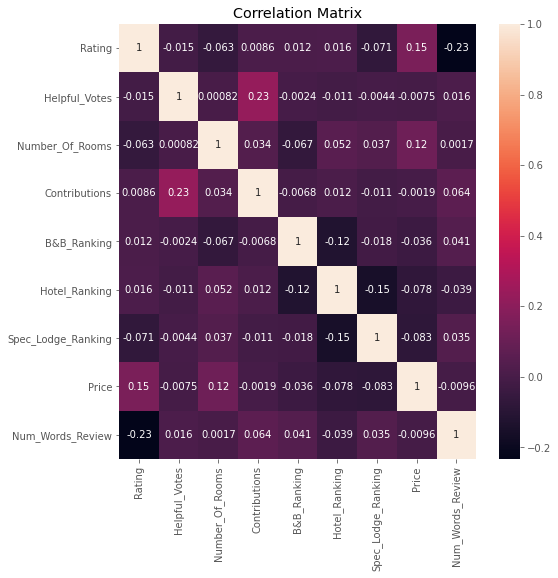

In [157]:
data_num_corr = data_num.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data_num_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

## **Analysis 2: Manos**

In [158]:
data_pd = pd.read_csv('Final_Hotel_Reviews_Clean.csv', index_col=0)
data_pd.head()

,Hotel_Name,Review,Rating,User_Location,Helpful_Votes,Number_Of_Rooms,Review_Title,Trip_Type,Ranking,Price_Range,Contributions,Low_Price_Room,High_Price_Room,B&B_Ranking,Hotel_Ranking,Spec_Lodge_Ranking
0,Eden_Lodge_Paris-Paris_Ile_de_France,We decided to stay one night at this ‘hotel’ a...,3.0,canada,40,5,More ‘b&b’ than hotel,Trip type: Travelled with family,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,32,207,342,28,0,0
1,Eden_Lodge_Paris-Paris_Ile_de_France,Having had experiences with other establishmen...,2.0,"Grottammare, Italy",103,5,Poorly managed property,Trip type: Travelled on business,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,171,207,342,28,0,0
2,Eden_Lodge_Paris-Paris_Ile_de_France,We loved everything about Eden Lodge! The lo...,5.0,"Stockholm, Sweden",2,5,A small and lovely gem in Paris!,Trip type: Travelled with friends,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,1,207,342,28,0,0
3,Eden_Lodge_Paris-Paris_Ile_de_France,It's little bit tricky to find it if you arriv...,5.0,NaN,3,5,Paradice in the heart of Paris,Trip type: Travelled as a couple,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,9,207,342,28,0,0
4,Eden_Lodge_Paris-Paris_Ile_de_France,Wonderfully hidden behind an inconspicuous doo...,4.0,"Antwerp, Belgium",63,5,Peaceful oasis in the midst of vibrance,NaN,['#28 of 152 B&Bs / Inns in Paris'],['US$207 - US$342 (Based on Average Rates for ...,121,207,342,28,0,0


In [160]:
def location_data(data):

    data["Country"] = ""

    locator = Nominatim(user_agent="myGeocoder")

    for i in range(len(data)):
        user_location = data["User_Location"][i]

        if not pd.isnull(user_location):
            location = locator.geocode(user_location,language='en')
            country = str(location).split(", ")[-1]

            data["Country"][i] = country

        else:

            data["Country"][i] = "Not entered"

    return data

data_with_countries = location_data(data_pd)

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/hudsonfinchbatista/testing_venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
# Get the mean rating for each country
countries_df = data_with_countries.groupby("Country")["Rating"].mean().reset_index()

# countries_df

countries_df.sort_values("Rating",ascending=False).head(20)

,Country,Rating
21,Dominican Republic,5.000000
45,Latvia,5.000000
100,Uruguay,5.000000
93,Trinidad and Tobago,5.000000
92,The Gambia,5.000000
5,Azerbaijan,5.000000
6,Barbados,5.000000
7,Belarus,5.000000
80,Seychelles,5.000000
31,Gibraltar,5.000000


In [162]:
countries_df.sort_values("Rating",ascending=False).tail(20)

,Country,Rating
16,Croatia,3.500000
44,Kuwait,3.500000
51,Malta,3.500000
86,Spain,3.477273
38,Iran,3.400000
60,None,3.375000
25,Europe,3.000000
2,Armenia,3.000000
22,Ecuador,3.000000
94,Tunisia,3.000000


In [163]:
dat = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = countries_df['Country'],
        locationmode = "country names",
        z = countries_df['Rating'],
        text = countries_df['Country'],
        colorbar = {'title' : 'Average Rating'},
      )

In [164]:
layout = dict(title = 'Average Hotel Rating by Country',
              geo = dict(projection = {'type':'mercator'}),
                 width=1000,
              height=1000
             )

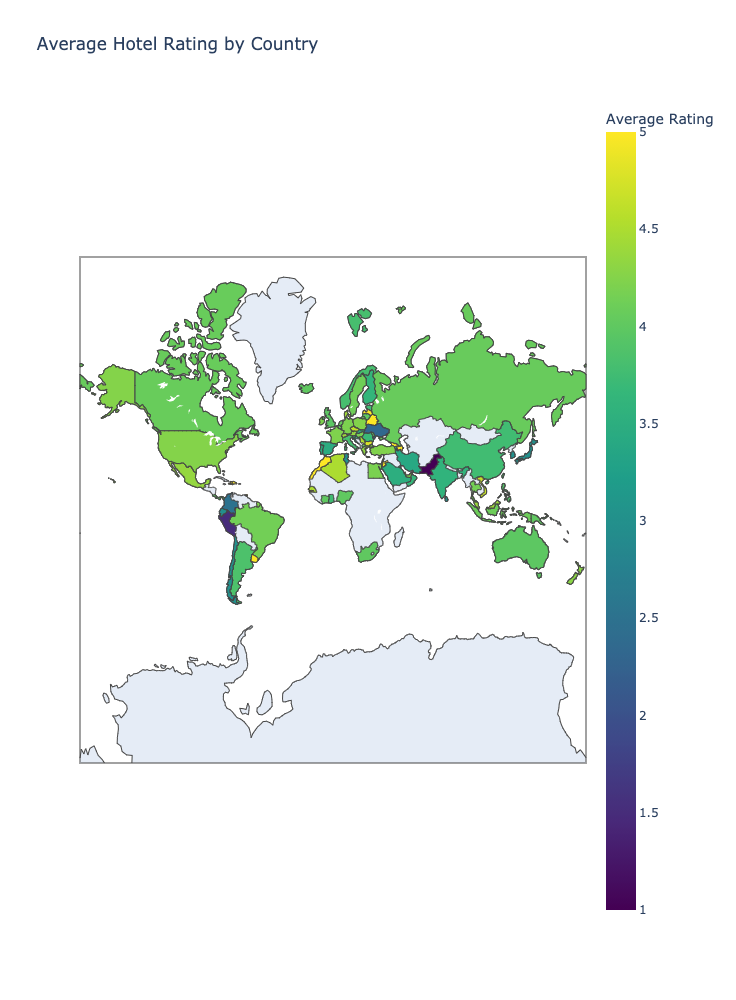

In [165]:
choromap = go.Figure(data = [dat],layout = layout)
iplot(choromap,validate=False)

In [166]:
# Get the mean rating for each country
countries_df_by_price = data_with_countries.groupby("Country")["Low_Price_Room"].mean().reset_index()

# countries_df

countries_df_by_price.sort_values("Low_Price_Room",ascending=False).head(20)

,Country,Low_Price_Room
13,China,262.238095
46,Lebanon,213.461538
59,Nigeria,206.000000
96,Ukraine,195.666667
68,Peru,187.000000
5,Azerbaijan,180.000000
97,United Arab Emirates,179.444444
89,Switzerland,178.342466
95,Turkey,175.461538
20,Denmark,175.057143


In [167]:
countries_df_by_price.sort_values("Low_Price_Room",ascending=False).tail(20)

,Country,Low_Price_Room
72,Qatar,102.000000
75,Saint Vincent and the Grenadines,101.000000
17,Cyprus,97.500000
37,Indonesia,97.500000
30,Ghana,97.250000
25,Europe,97.000000
67,Papua New Guinea,96.333333
38,Iran,96.000000
92,The Gambia,96.000000
2,Armenia,95.000000


In [168]:
dat = dict(
        type = 'choropleth',
        colorscale = 'Magma',
        locations = countries_df_by_price['Country'],
        locationmode = "country names",
        z = countries_df_by_price['Low_Price_Room'],
        text = countries_df_by_price['Country'],
        colorbar = {'title' : 'Average Price Paid'},
      )

In [169]:
layout = dict(title = 'Average Hotel Price Paid by Country',
              geo = dict(projection = {'type':'mercator'}),
                  width=1000,
              height=1000
             )

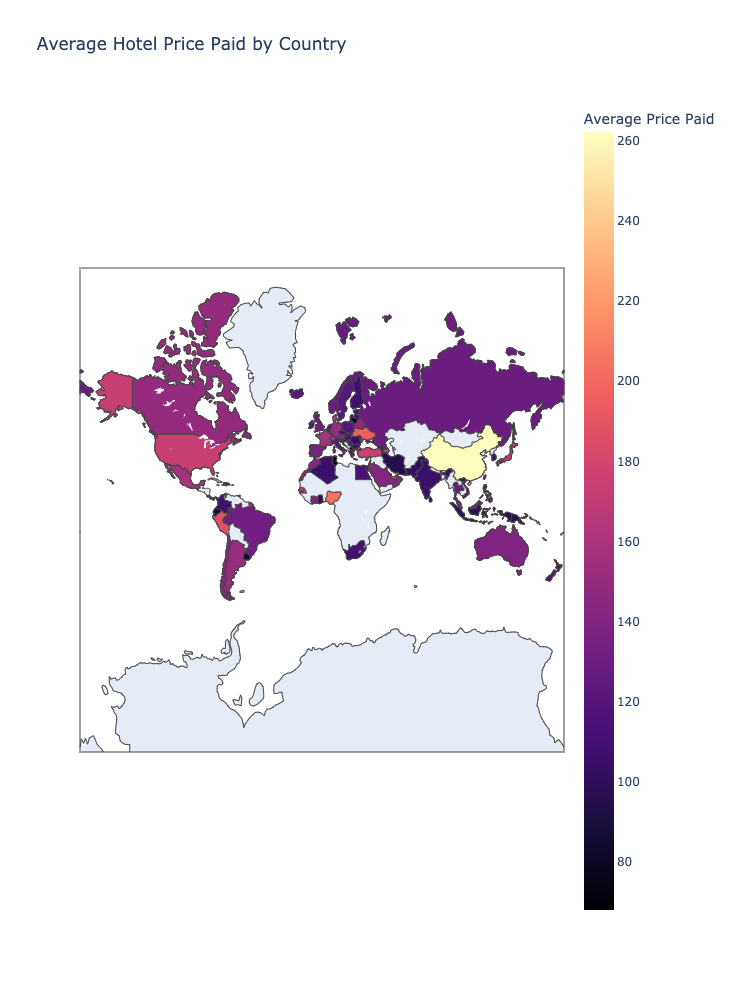

In [170]:
choromap = go.Figure(data = [dat],layout = layout)
iplot(choromap,validate=False)